In [14]:
from utils import *

## Exercice 1 - Fichier `mouse.txt`

La détection d’anomalies est une tâche de l’apprentissage automatique qui consiste à déceler dans les données, les individus ayant un comportement différent des autres instances de la base dites normales. Dans cet exercice, nous allons nous pencher sur l'implémentation et le test de différents algorithmes de détection d'outliers via la librairie scikit-learn. 

Le fichier étudié contient 500 instances décrites par deux variables x1 et x2, représentant des points de la tête de Mickey Mouse. Les 10 dernières instances du fichier sont des outliers.

In [15]:
# 1. Charger les données
data = load_data('data/mouse.txt')

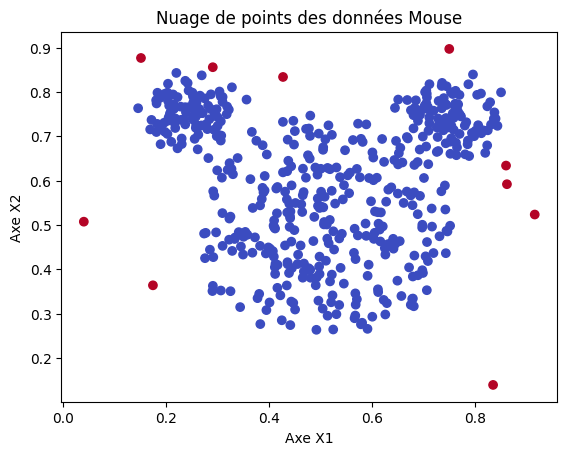

In [16]:
# 2. Visualiser les données
plot_data(data, title="Nuage de points des données Mouse")

### Premier algorithme : Isolation Forest

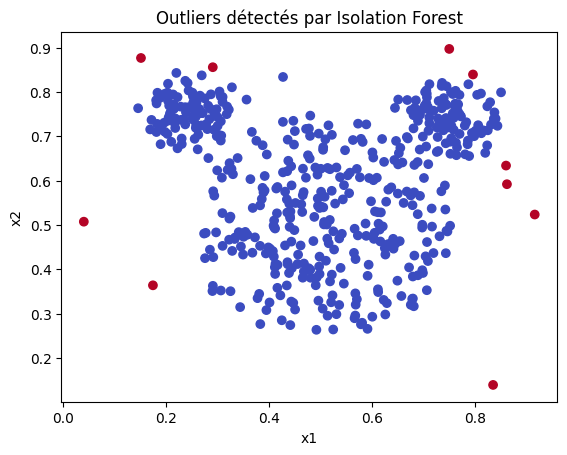

In [17]:
# 3. Détecter les outliers avec Isolation Forest
data, iso_scores = detect_outliers_isolation_forest(data)
plot_outliers(data, method='iso')

### Second algorithme : Local Outlier Factor

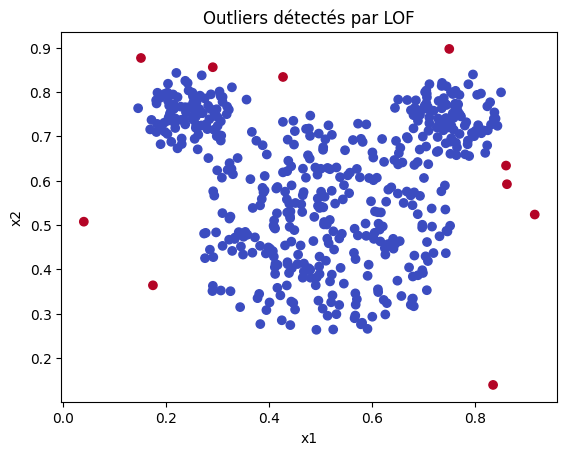

In [18]:
# 4. Détecter les outliers avec LOF
data, lof_scores = detect_outliers_lof(data)
plot_outliers(data, method='lof')

### Comparaison des outliers pour les 2 algorithmes

On voit dans le tableau suivant que le LOF détecte l'ensemble des true_outliers tandis que ISO se trompe sur un outlier. Le contamination_rate est fixé au départ pour les 2 algorithmes à 2% qui correspond au nombre d'outliers comptés réellement dans le dataset. ISO détecte un autre datapoint comme un outlier.

In [19]:
data.iloc[-10:]

,x1,x2,true_outlier,iso_outlier,lof_outlier
490,0.290950,0.855767,-1,-1,-1
491,0.750068,0.897028,-1,-1,-1
492,0.040555,0.507240,-1,-1,-1
493,0.835162,0.138940,-1,-1,-1
494,0.174740,0.363686,-1,-1,-1
495,0.151506,0.876586,-1,-1,-1
496,0.860308,0.633833,-1,-1,-1
497,0.862083,0.591805,-1,-1,-1
498,0.916030,0.523391,-1,-1,-1
499,0.427325,0.833767,-1,1,-1


La suite de l'étude porte sur les scores de chaque élément du dataset. L'objectif est d'utiliser des algorithmes de clustering sur les scores afin d'identifier automatiquement le meilleur seuil pour détecter les outliers.

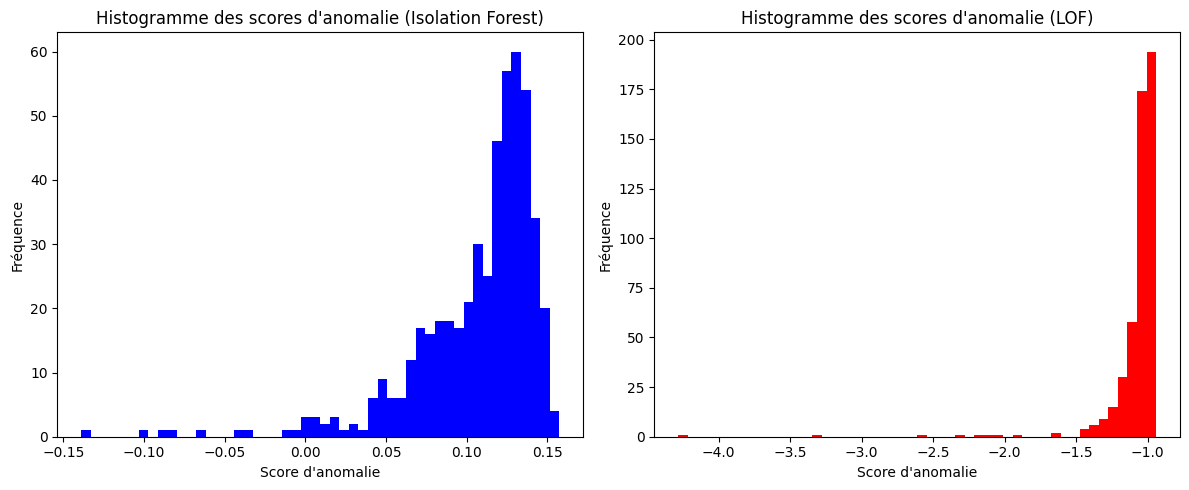

In [20]:
# 5. Afficher les histogrammes des scores d'anomalie
plot_anomaly_scores(iso_scores, lof_scores)

In [21]:
# Ajuster le seuil avec K-Means pour Isolation Forest
iso_kmeans_outliers, iso_kmeans_threshold = adjust_threshold_with_kmeans(data, iso_scores, k=5)

# Ajuster le seuil avec IQR pour Isolation Forest
iso_iqr_outliers, iso_iqr_threshold = adjust_threshold_with_iqr(data, iso_scores)

# Ajuster le seuil avec K-Means pour LOF
lof_kmeans_outliers, lof_kmeans_threshold = adjust_threshold_with_kmeans(data, lof_scores)

# Ajuster le seuil avec IQR pour LOF
lof_iqr_outliers, lof_iqr_threshold = adjust_threshold_with_iqr(data, lof_scores)

Ci-dessous sont affichés les résultats des K-Means et IQR. Ici, le contamination_rate n'est pas fixé mais l'algorithme trouve un seuil pour détection de outliers. On voit graphiquement que les outliers sont détectés mais l'algorithme en détecte trop la plupart du temps. Pour K-Means, le nombre de cluster a été fixé à 2 dans un premier temps. La combinaison LOF + K-Means se rapproche le plus du dataset en détectant uniquement 8 des 10 outliers de départ.

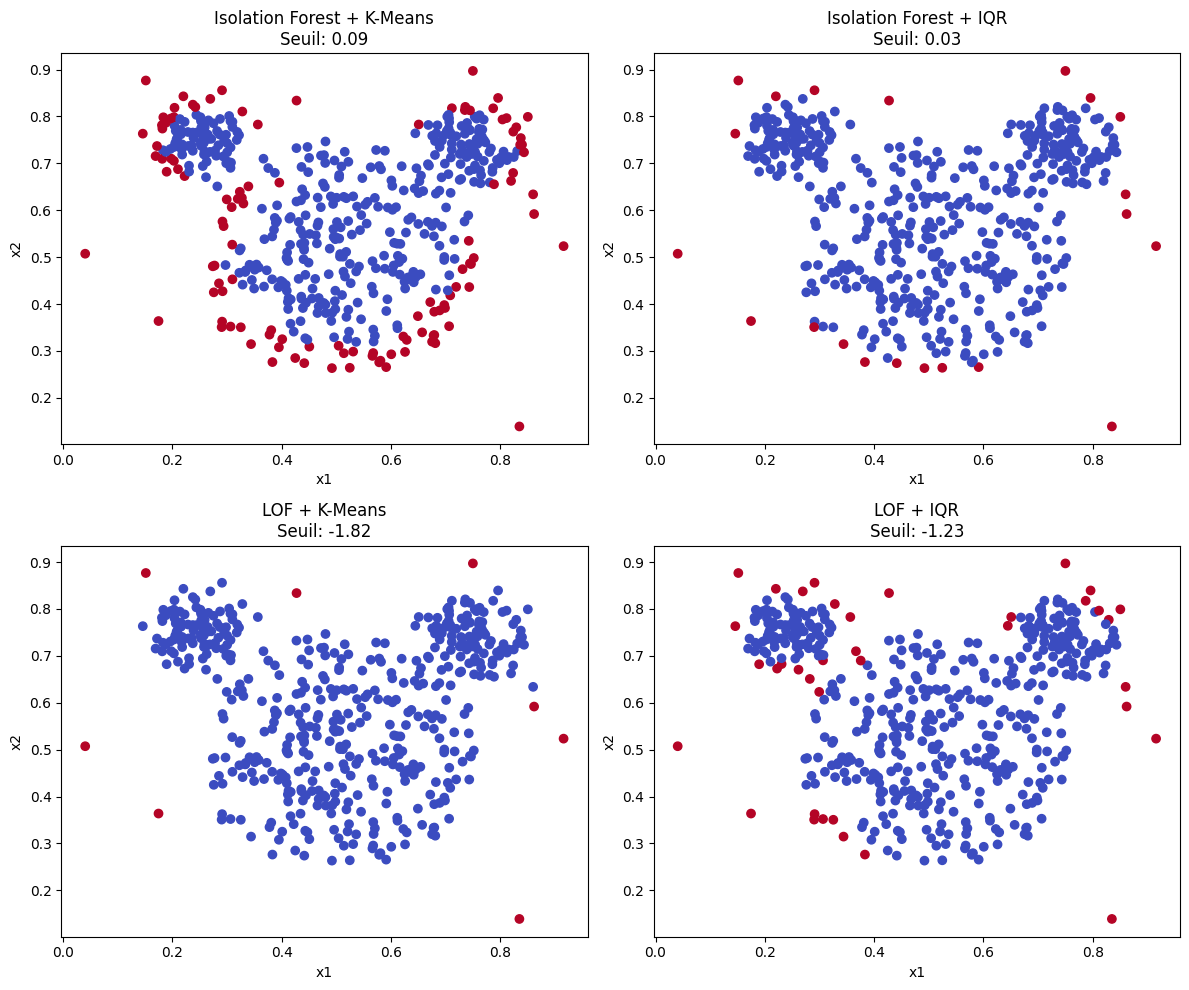

In [22]:
# Visualiser les résultats
plot_unsupervised_results(data, iso_kmeans_outliers, iso_kmeans_threshold, iso_iqr_outliers, iso_iqr_threshold,
             lof_kmeans_outliers, lof_kmeans_threshold, lof_iqr_outliers, lof_iqr_threshold)

Ce que l'on peut faire pour améliorer la précision de l'algorithme K-Means est d'augmenter le nombre de clusters et analyser unqiuement le dernier cluster sur les valeurs des scores correspondant aux outliers. On essaie avec k = 5.

In [ ]:
# Ajuster le seuil avec K-Means pour Isolation Forest
iso_kmeans_outliers, iso_kmeans_threshold = adjust_threshold_with_kmeans(data, iso_scores, k = 5)

# Ajuster le seuil avec K-Means pour LOF
lof_kmeans_outliers, lof_kmeans_threshold = adjust_threshold_with_kmeans(data, lof_scores, k = 5)

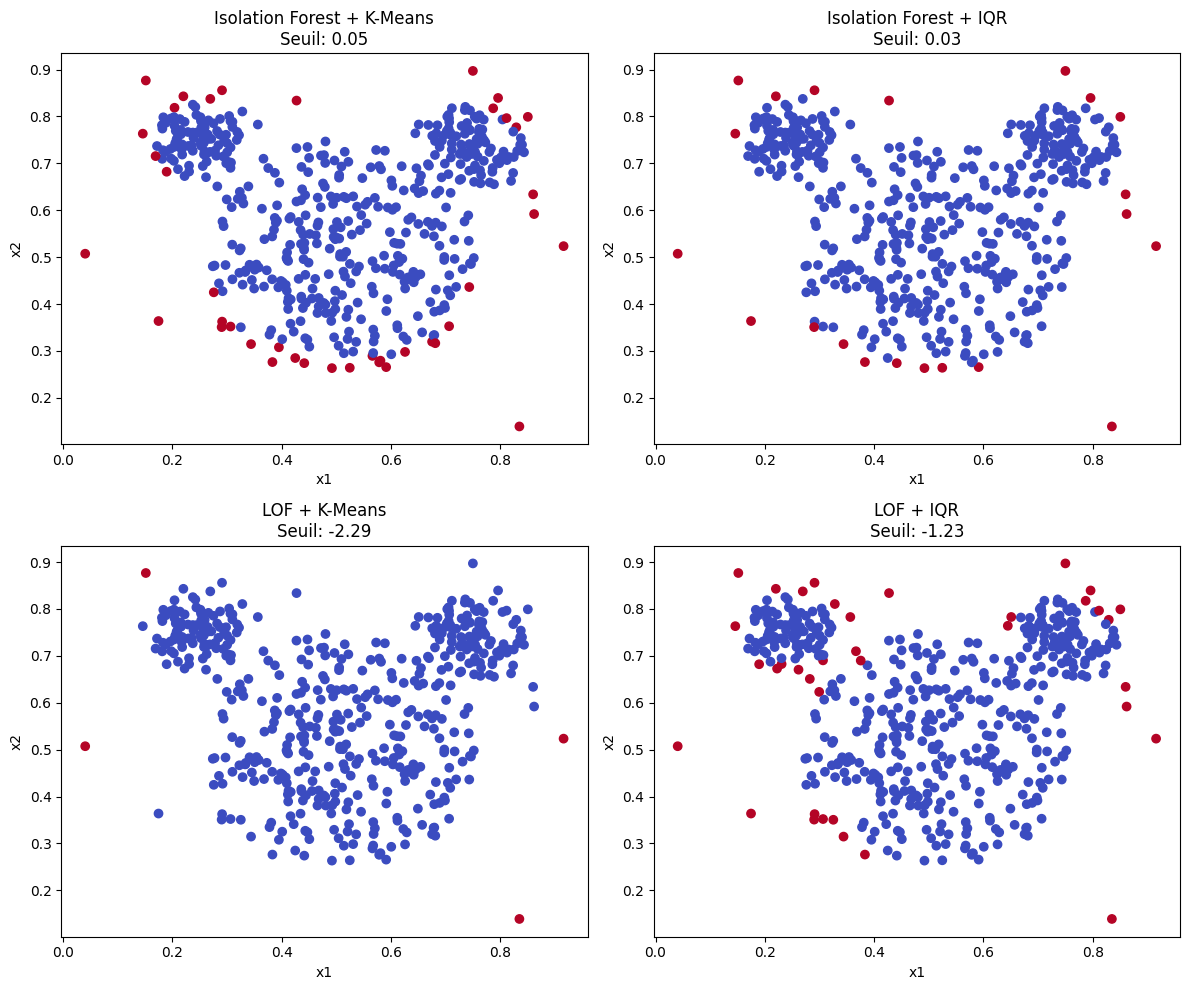

In [29]:
# Visualiser les résultats
plot_unsupervised_results(data, iso_kmeans_outliers, iso_kmeans_threshold, iso_iqr_outliers, iso_iqr_threshold,
             lof_kmeans_outliers, lof_kmeans_threshold, lof_iqr_outliers, lof_iqr_threshold)

On voit que beaucoup moins de data points sont détectés en tant que outliers pour IF et LOF. Il pourrait être intéressant de trouver le nombre de clusters optimals et donc le seuil optimal pour IF et pour LOF respectivement afin de ne détecter que le nombre exacte d'outliers dans le dataset de départ.

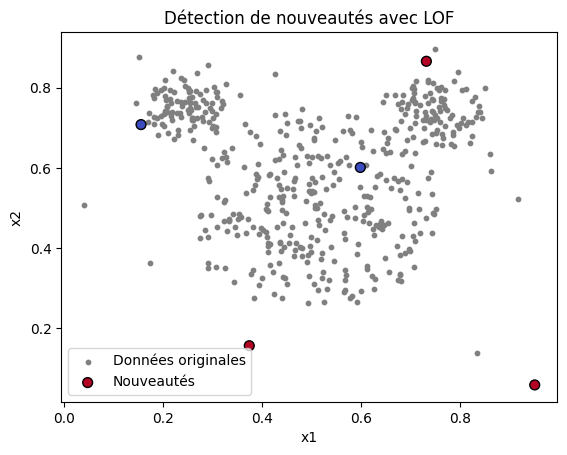

In [12]:
# 8. Détecter des nouveautés avec LOF

new_data = create_new_data(5)
novelty_scores = detect_novelty_lof(data, new_data)
plot_novelty_detection(data, new_data, novelty_scores)

Nous nous sommes penchés sur la détection de nouveautés en utilisant la méthode LOF. Pour cela, on génère 5 points aléatoirement dans l'intervalle [0, 1]. Visuelellement, on analyse que 3 des 5 points sont détectés comme étant des outliers. Si l'on regarde, ces 3 points se situent soit aux extrémités de la figure, soit en dehors de celle-ci. Cela montre une bonne détection des nouveautés sur ces 5 nouveaux points.

## Exercice 2 - Partie 1 - Fichier `creditcard.csv`

In [30]:
# 1. Charger les données
data = load_data('data/creditcard.csv')

In [31]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 227451, 1: 394})


In [ ]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train, contamination=0.00172),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}

# Evaluation des modèles
result_evaluation(models, X_train, X_test, y_train, y_test)

In [ ]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y)


EasyEnsemble Cross-Validation Results:
F1-score: 0.0868
ROC AUC: 0.9772
Average Precision: 0.7480
Balanced Accuracy: 0.9373

XGBoost Cross-Validation Results:
F1-score: 0.7985
ROC AUC: 0.9795
Average Precision: 0.8047
Balanced Accuracy: 0.9041

RandomForest Cross-Validation Results:
F1-score: 0.7885
ROC AUC: 0.9441
Average Precision: 0.7584
Balanced Accuracy: 0.8575

TomekLinks Cross-Validation Results:
F1-score: 0.7517
ROC AUC: 0.9322
Average Precision: 0.7373
Balanced Accuracy: 0.8686

SMOTE Cross-Validation Results:
F1-score: 0.7517
ROC AUC: 0.9322
Average Precision: 0.7373
Balanced Accuracy: 0.8686



## Exercice 2 - Partie 2 - Fichier `KDDCup99.csv`

In [ ]:
data = load_data('data/KDDCup99.csv')
data['label'].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [ ]:
# Prétraiter les données
X_scaled, y = preprocess_data(data)

# Séparer les données
X_train, X_test, y_train, y_test = split_data(X_scaled, y)

print("Comptage des classes dans y_train :")
print(Counter(y_train))


Comptage des classes dans y_train :
Counter({0: 77821, 1: 24})


EasyEnsemble Results:
Confusion Matrix:
[[19024   432]
 [    0     6]]
F1-score: 0.0270
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9889



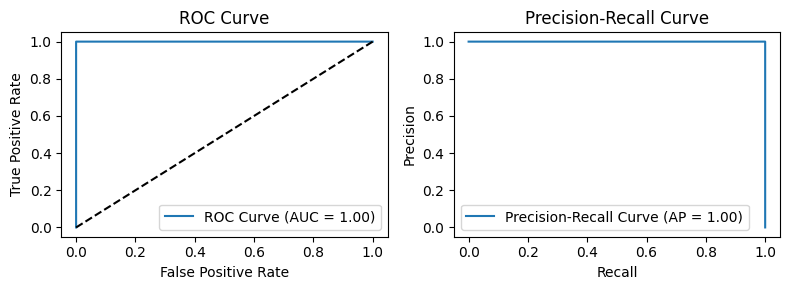

IsolationForest Results:
Confusion Matrix:
[[19417    39]
 [    6     0]]
F1-score: 0.0000
ROC AUC: 0.8666
Average Precision: 0.0014
Balanced Accuracy: 0.4990



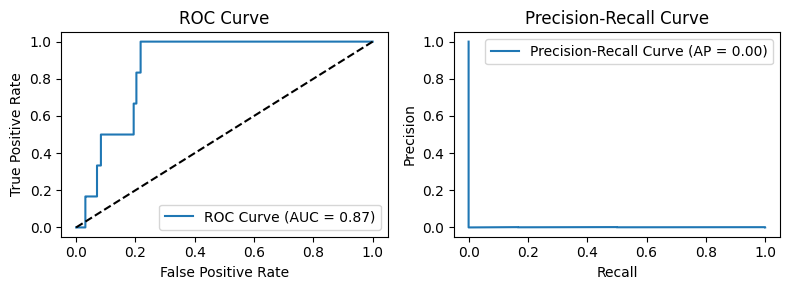

LOF Results:
Confusion Matrix:
[[17533  1923]
 [    5     1]]
F1-score: 0.0010
ROC AUC: 0.5394
Average Precision: 0.0009
Balanced Accuracy: 0.5339



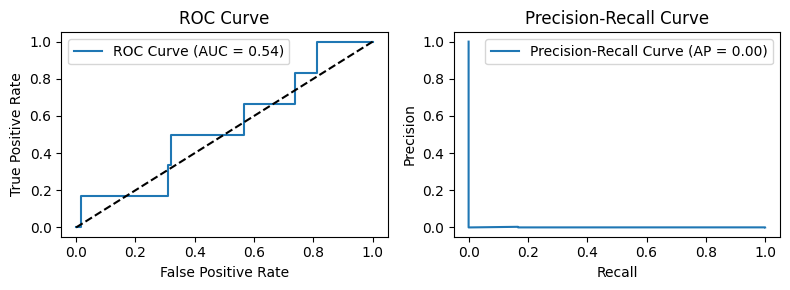

XGBoost Results:
Confusion Matrix:
[[19454     2]
 [    0     6]]
F1-score: 0.8571
ROC AUC: 1.0000
Average Precision: 0.9583
Balanced Accuracy: 0.9999



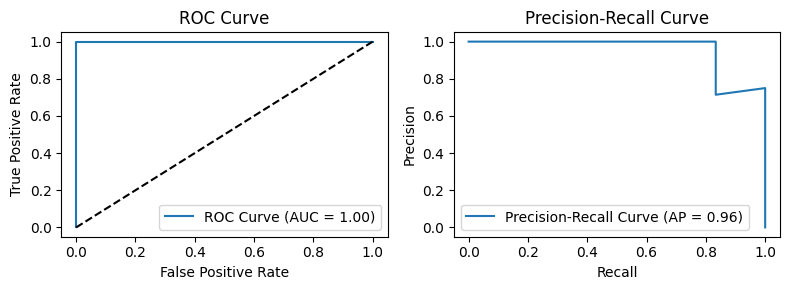

RandomForest Results:
Confusion Matrix:
[[19456     0]
 [    1     5]]
F1-score: 0.9091
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 0.9167



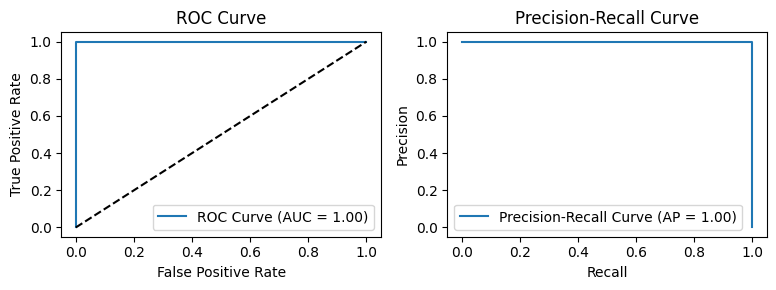

TomekLinks Results:
Confusion Matrix:
[[19456     0]
 [    0     6]]
F1-score: 1.0000
ROC AUC: 1.0000
Average Precision: 1.0000
Balanced Accuracy: 1.0000



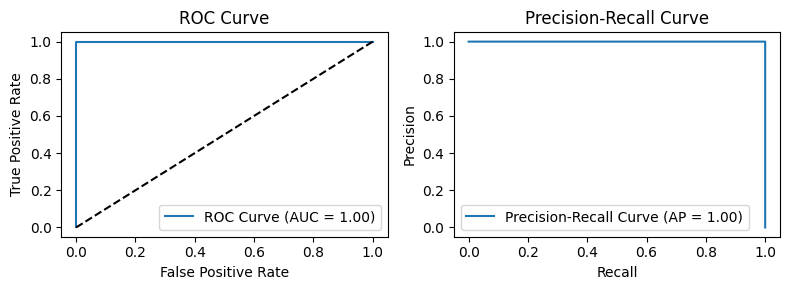

SMOTE Results:
Confusion Matrix:
[[19454     2]
 [    0     6]]
F1-score: 0.8571
ROC AUC: 1.0000
Average Precision: 0.9107
Balanced Accuracy: 0.9999



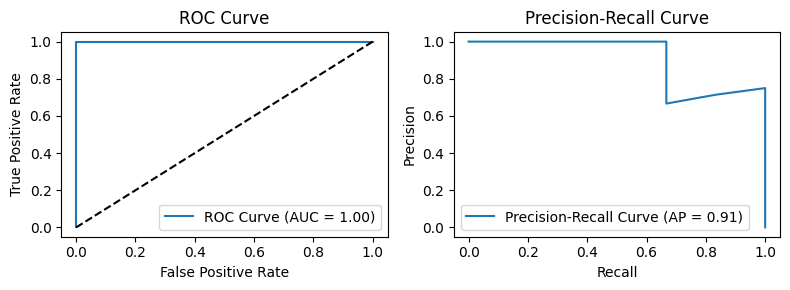

In [ ]:
# Définir les modèles à tester
models = {
    'EasyEnsemble': train_easy_ensemble(X_train, y_train),
    'IsolationForest': train_isolation_forest(X_train, contamination=0.00172),
    'LOF': train_lof(X_train),
    'XGBoost': train_xgboost(X_train, y_train),
    'RandomForest': train_random_forest(X_train, y_train),
    'TomekLinks': train_with_tomek_links(X_train, y_train),
    'SMOTE': train_with_smote(X_train, y_train)
}

# Evaluation des modèles
result_evaluation(models, X_train, X_test, y_train, y_test)

In [ ]:
# Cross validation sur les modèles
result_cross_val(models, X_scaled, y)

EasyEnsemble Cross-Validation Results:
F1-score: 0.0485
ROC AUC: 0.9796
Average Precision: 0.6262
Balanced Accuracy: 0.9240

XGBoost Cross-Validation Results:
F1-score: 0.6981
ROC AUC: 0.9987
Average Precision: 0.8105
Balanced Accuracy: 0.8833

RandomForest Cross-Validation Results:
F1-score: 0.6867
ROC AUC: 1.0000
Average Precision: 0.9193
Balanced Accuracy: 0.8167

TomekLinks Cross-Validation Results:
F1-score: 0.6587
ROC AUC: 0.9999
Average Precision: 0.8818
Balanced Accuracy: 0.8166

SMOTE Cross-Validation Results:
F1-score: 0.6587
ROC AUC: 0.9999
Average Precision: 0.8818
Balanced Accuracy: 0.8166

